In [1]:
import numpy as np
np.random.seed(254)
import matplotlib.pyplot as plt

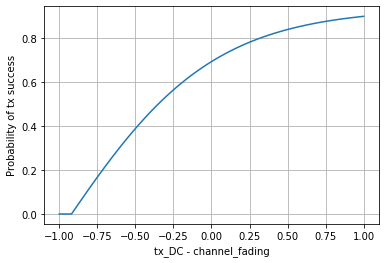

In [2]:
def tr(diff,k=2):
#     x = inp+0.85
    offset = 1
    x = diff+offset
    y = (1 + np.exp(-k*(1+offset))) / (1 + np.exp(-k*x)) 
    y = y*2-1.1
    return np.clip(y,0,1)
    
b = np.linspace(-1,1,100)
m = tr(b)
plt.xlabel("tx_DC - channel_fading")
plt.ylabel("Probability of tx success")
plt.plot(b,m)
plt.grid(True)

In [3]:
def tx_prob(tx_power,ch_gain):
    k = 2
    diff = tx_power-ch_gain
    offset = 1
    x = diff+offset
    y = (1 + np.exp(-k*(1+offset))) / (1 + np.exp(-k*x)) 
    y = y*2-1.1
    y = np.clip(y,0,1)
    
    return np.where(tx_power<0.01,0,y)



In [4]:
resolution = 2000
tx_power = np.linspace(0,1,resolution)
ch_gain = np.linspace(0,1,resolution)

In [5]:
xx, yy = np.meshgrid(tx_power, ch_gain)
tx_pb = tx_prob(xx,yy)

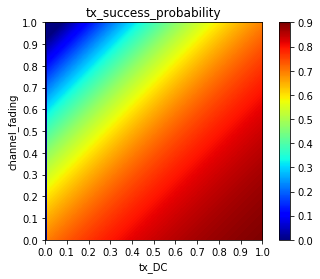

In [6]:
fig,ax = plt.subplots(1)
plt.title('tx_success_probability')
plt.imshow(tx_pb, cmap='jet',origin='lower', interpolation="none")
plt.colorbar()
plt.xlabel("tx_DC")
plt.ylabel("channel_fading")
plt.xticks(ticks=np.linspace(0,resolution,11), labels=np.linspace(0,resolution,11)/resolution)
plt.yticks(ticks=np.linspace(0,resolution,11), labels=np.linspace(0,resolution,11)/resolution)
plt.show()

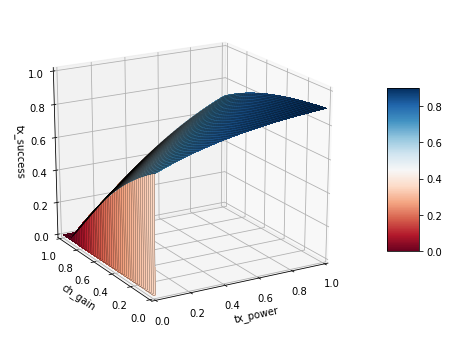

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
# ax = fig.gca(figsize=(5,5),projection='3d')
ax.view_init(azim=-120, elev=20)
surf = ax.plot_surface(xx,yy,tx_pb, cmap=cm.RdBu,linewidth=0, antialiased=False)
wsurf = ax.plot_wireframe(xx,yy,tx_pb,color='k',linewidth = 0.25 )

fig.colorbar(surf, shrink=0.5, aspect=5 )
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('tx_power')
ax.set_ylabel('ch_gain')
ax.set_zlabel('tx_success')
plt.show()

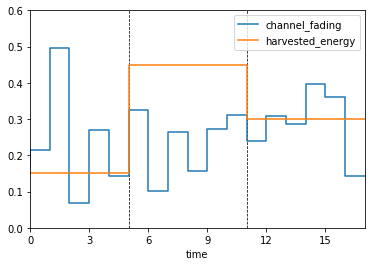

In [8]:
np.random.seed(447)
t = np.arange(0,18)
henergy = np.array([0.15]*6+[0.45]*6+[0.3]*6)
ch_fading = np.random.uniform(low=0.01,high=0.5,size=18)

plt.step(t,ch_fading,label='channel_fading')
plt.step(t,henergy,label='harvested_energy')
plt.vlines(x=5,ymin=0,ymax=0.6,linewidth=0.75,linestyle='--')
plt.vlines(x=11,ymin=0,ymax=0.6,linewidth=0.75,linestyle='--')

plt.ylim([0,0.6])
plt.xlim([0,17])
plt.yticks()
plt.xticks(np.arange(0,18,3))
plt.xlabel('time')
plt.legend(loc='upper right')


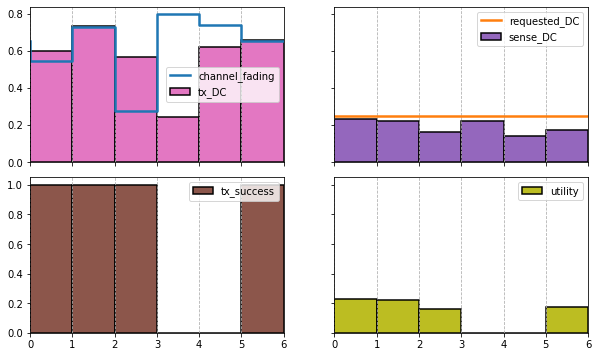

In [92]:
fig, ax = plt.subplots(2,2,figsize=(10, 6),sharex=True,sharey='row',
                      gridspec_kw={'hspace': 0.1, 'wspace': 0.2})

np.random.seed(109)
t = np.arange(0,6)
ch_fading = np.random.uniform(low=0.1,high=1,size=6)
req_DC = np.array([0.25]*6)

ch_fading_plus = np.append(ch_fading, ch_fading[0])
req_DC_plus = np.append(req_DC, req_DC[0])
t_plus = np.arange(0,7)

tx_DC = (ch_fading)+np.random.uniform(low=-0.2,high=0.2,size=6)
sense_DC = np.random.uniform(low=0.1,high=0.23,size=6)

success = np.array([1,1,1,0,0,1])
utility = np.multiply(success,sense_DC)

xtra = 1-(tx_DC+sense_DC)

ax[0,0].bar(t,tx_DC,color='tab:pink',label='tx_DC',width=1.0, align='edge',edgecolor='k',linewidth=1.5)
ax[0,1].bar(t,sense_DC,color='tab:purple',label='sense_DC',width=1.0, align='edge',edgecolor='k',linewidth=1.5)
ax[0,0].step(t_plus,ch_fading_plus,color='tab:blue',label='channel_fading',linewidth=2.5,where='pre')
ax[0,1].step(t_plus,req_DC_plus,color='tab:orange',label='requested_DC',linewidth=2.5)

ax[1,0].bar(t,success,color='tab:brown',label='tx_success',width=1.0, align='edge',edgecolor='k',linewidth=1.5)
ax[1,1].bar(t,utility,color='tab:olive',label='utility',width=1.0, align='edge',edgecolor='k',linewidth=1.5)

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlim([0,6])
        ax[i,j].xaxis.grid(True,linestyle='--')
        ax[i,j].legend()

Text(0.5, 1.0, 'Energy Allocation')

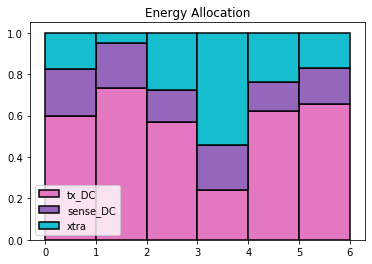

In [93]:
plt.bar(t,tx_DC,color='tab:pink',label='tx_DC',width=1.0, align='edge',edgecolor='k',linewidth=1.5)
plt.bar(t,sense_DC,bottom=tx_DC,color='tab:purple',label='sense_DC',width=1.0, align='edge',edgecolor='k',linewidth=1.5)
plt.bar(t,xtra,bottom=tx_DC+sense_DC,color='tab:cyan',label='xtra',width=1.0, align='edge',edgecolor='k',linewidth=1.5)
plt.legend()
plt.title('Energy Allocation')